<a href="https://colab.research.google.com/github/daniballester-ai/classificacao_textos_spaCy/blob/main/Classifica%C3%A7%C3%A3o_de_Textos_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import spacy
spacy.__version__

'3.7.5'

In [2]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Etapa 2: Carregamento da base de dados

In [5]:
base_dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA_EXPERT/base_treinamento.txt', encoding = 'utf-8')

In [6]:
base_dados.shape

(196, 2)

In [7]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [8]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


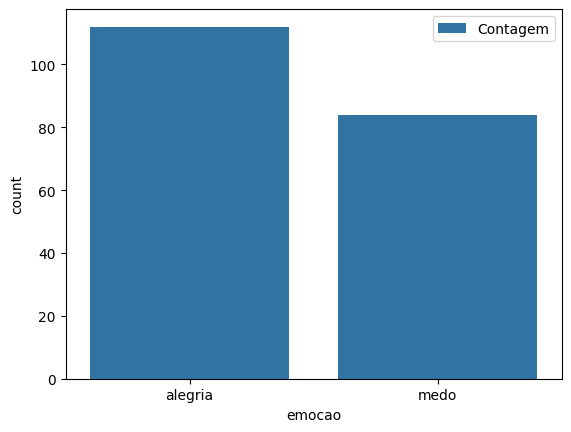

In [9]:
sns.countplot(x='emocao', data=base_dados, label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [10]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [12]:
print(stop_words)

{'tem', 'então', 'ter', 'tipo', 'ponto', 'próximo', 'primeira', 'não', 'zero', 'nove', 'iniciar', 'nessa', 'cedo', 'longe', 'tivemos', 'dentro', 'lugar', 'uns', 'na', 'como', 'menos', 'quanto', 'dez', 'tens', 'dessa', 'estivemos', 'mesmo', 'falta', 'grandes', 'vós', 'tão', 'fazemos', 'além', 'dá', 'num', 'todo', 'após', 'todos', 'seu', 'momento', 'naquele', 'obrigado', 'estar', 'por', 'vezes', 'são', 'tua', 'poderá', 'área', 'que', 'nunca', 'diz', 'vossos', 'tentei', 'inclusive', 'povo', 'esteve', 'obrigada', 'fazeis', 'põe', 'vai', 'algo', 'custa', 'tais', 'ela', 'desse', 'pelo', 'sistema', 'lá', 'essas', 'cujo', 'dezanove', 'certeza', 'fostes', 'esse', 'já', 'tive', 'deste', 'nosso', 'onde', 'seis', 'duas', 'apoia', 'quinto', 'ao', 'certamente', 'sempre', 'acerca', 'foste', 'estiveste', 'demais', 'quais', 'vinda', 'grupo', 'novas', 'seus', 'vais', 'enquanto', 'ir', 'aquele', 'aquilo', 'porquê', 'ou', 'ser', 'uma', 'bom', 'maioria', 'o', 'elas', 'dar', 'vossas', 'valor', 'sob', 'estão

In [13]:
len(stop_words)

416

In [14]:
#pln = spacy.load('pt')
pln = spacy.load("pt_core_news_sm")

In [15]:
pln

In [16]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [17]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [18]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [19]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [20]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [21]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [22]:
type(exemplo_base_dados)

list

In [23]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [24]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [25]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [26]:
type(exemplo_base_dados[0][1])

dict

In [27]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [28]:
len(base_dados_final)

196

In [29]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [30]:
base_dados_final[0][0]

'trabalho agradável'

In [31]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [32]:
type(base_dados_final[0][1])

dict

In [33]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

# Etapa 5: Criação do classificador

In [34]:
from spacy.training import Example

In [36]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [38]:
modelo.begin_training()
for epoca in range(1000): #de 1000 para 100
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.7476114183664322}
{'textcat': 5.0252404451209265e-11}
{'textcat': 6.750081152665996e-12}
{'textcat': 1.9358761318424237e-12}
{'textcat': 7.021972301448623e-13}
{'textcat': 3.0296559599724167e-13}
{'textcat': 1.2935243086614583e-13}
{'textcat': 7.102193343456738e-14}
{'textcat': 3.155868578616494e-14}
{'textcat': 1.7171364250138476e-14}


In [39]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [40]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.73526490e+00, 1.74761142e+00, 5.02524045e-11, 6.75008115e-12,
       1.93587613e-12, 7.02197230e-13, 3.02965596e-13, 1.29352431e-13,
       7.10219334e-14, 3.15586858e-14, 1.71713643e-14])

Text(0, 0.5, 'Erro')

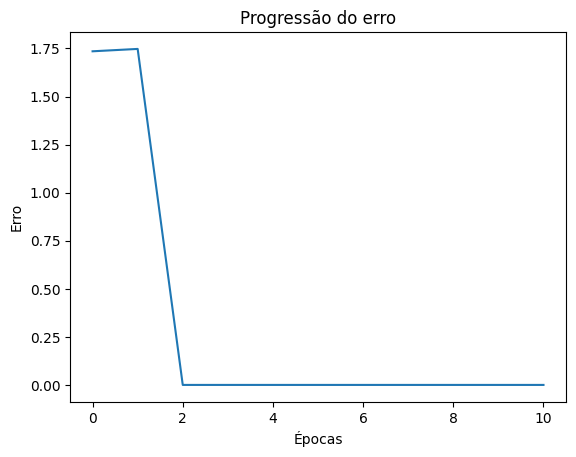

In [41]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [42]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [43]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [44]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [45]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [46]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [47]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 4.016202481693654e-08}

In [48]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 1.4600358611005504e-07, 'MEDO': 0.9999998807907104}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [49]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [50]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 1.5483927029436018e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.5625563065668757e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.392618795951876e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.7557038489712795e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.8676494774090315e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4114393209752052e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.016202481693654e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.883792855039701e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.747238602220705e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.158629719417604e-08},
 {'ALEGRIA': 1.0, 'MEDO': 9.62894386447033e-09},
 {'ALEGRIA': 1.0, 'MEDO': 8.241949345233479e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.463112241419708e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.1905509345619976e-09},
 {'ALEGRIA': 0.9999997615814209, 'MEDO': 2.048203100457613e-07},
 {'ALEGRIA': 1.0, 'MEDO': 1.3180724067751726e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0079546914075763e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.4392175773945155e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.23458823561873e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.

In [51]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [52]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [53]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [55]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [58]:
base_dados_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA_EXPERT/base_teste.txt', encoding = 'utf-8')

In [59]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [60]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [61]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [62]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [63]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [64]:
respostas_reais = base_dados_teste['emocao'].values

In [65]:
accuracy_score(respostas_reais, previsoes_final)

0.6190476190476191

In [66]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[31, 17],
       [15, 21]])